# Autor: David Góez

# Particle Swarm Optimization (PSO)
Particle swarm optimization (PSO) is a family of heuristic optimization methods inspired by the natural behaviors of bee swarms, insect movements in large groups, and schools of fish. These methods analyze how individuals in a group move to achieve a common goal, taking advantage of constant communication within the group. Each individual adjusts its movement based on three key factors:

Its own experience, specifically the best positions it has encountered so far.
The best position identified by any other member of the swarm.
An inertial factor that smooths out its movements by considering the velocity from its previous step.
This dynamic allows particles to explore the solution space efficiently. The velocity of each particle is described mathematically in equation (1), while the position of the 
𝑖
i-th particle is given in equation (2) (Lee & Kim, 2013; Clerc, 2005; Leonard & Engelbrecht, 2013).
Tomado de http://hdl.handle.net/20.500.12622/117

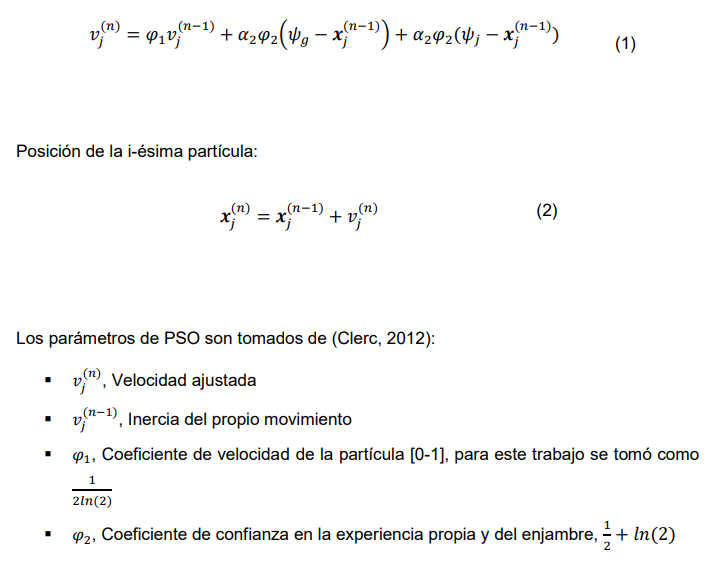

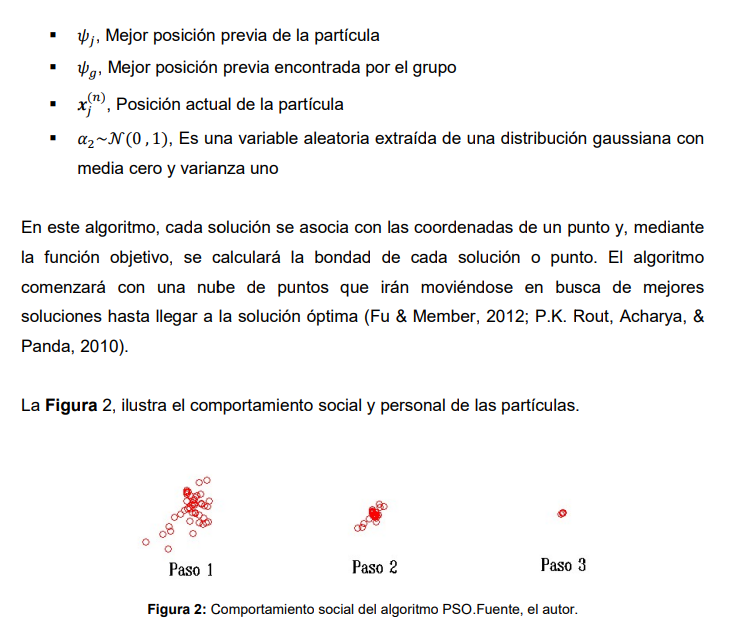

## Función de prueba

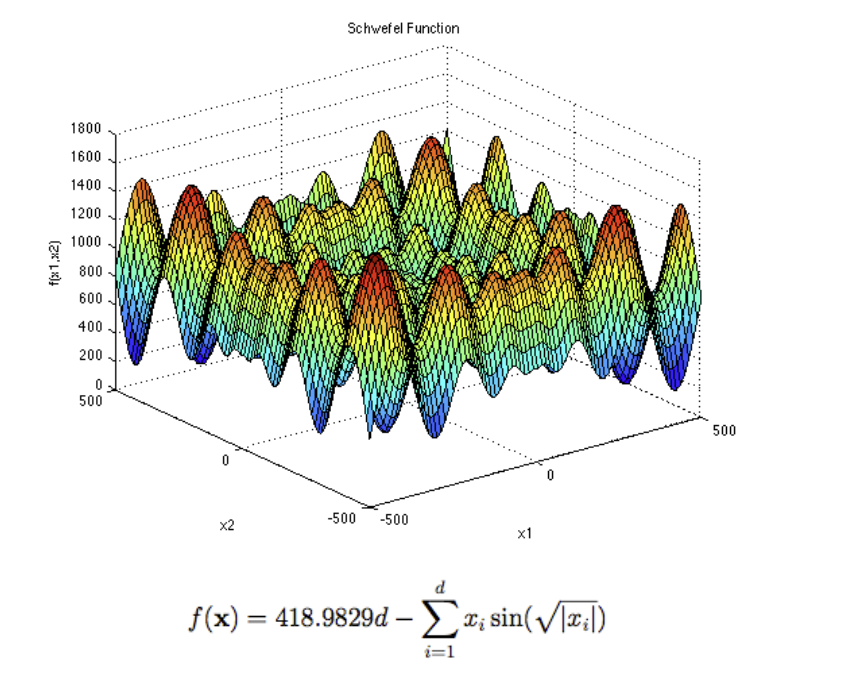

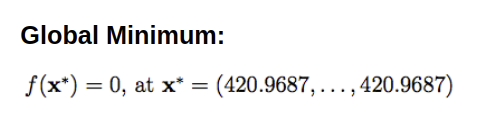

In [1]:
# https://www.sfu.ca/~ssurjano/schwef.html
def Schwefel(x,y):
    n =2;
    V = 4189.829101;

#     x = np.linspace(-500,100,500)

#     y = np.linspace(-500,100,500)

#     [x,y] = np.meshgrid(x,y)

    z = n*V+(-x*np.sin(np.sqrt(np.abs(x)))) + (-y*np.sin(np.sqrt(np.abs(y))))
    # print(z)
    return z

In [2]:
import numpy as np
import matplotlib.pyplot as plt

n=50; #Número de partículas para hacer la búsqueda
Xnuevo=np.random.rand(n,2)*1000-500; #Posiciones iniciales
Vnuevo=0.01*np.random.rand(n,2)*1000-500; #Velocidades iniciales
Xast=Xnuevo
Fnuevo=np.zeros(n)
for i in range(n):
    Fnuevo[i] = Schwefel(Xnuevo[i,0],Xnuevo[i,1])
g=np.min(Fnuevo)
mejor=Xnuevo[list(Fnuevo).index(g)]
# print(mejor)
for cont in range(800):
    X = Xnuevo
    V = Vnuevo
    F = Fnuevo
    Xnuevo=X+V
    Xnuevo = np.where(Xnuevo>=500,500,  Xnuevo)
    Xnuevo = np.where(Xnuevo<=-500,-500, Xnuevo)
    for i in range(n):
        Fnuevo[i] = Schwefel(Xnuevo[i,0],Xnuevo[i,1])
        if Fnuevo[i] < F[i]:
            Xast[i,:]=Xnuevo[i,:] #Mejor posición de la partícula i
    g=np.min(Fnuevo)
    mejornuevo=Xnuevo[list(Fnuevo).index(g)]
    if(Schwefel(mejornuevo[0],mejornuevo[1]) < Schwefel(mejor[0],mejor[1])):
        mejor=mejornuevo;
        print(mejor)
        
    Vnuevo = V+0.05*np.random.rand()*(mejor-Xnuevo)+0.05*np.random.rand()*(Xast-Xnuevo)



[ 417.08636541 -500.        ]
[ 422.68862002 -500.        ]
[410.02859803 392.02892033]
[439.94716645 423.50315737]
[426.49177916 411.66273879]
[416.19745283 422.22828986]
[422.09393141 420.20504109]
[421.70143345 421.27602612]
